# Load the data

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/dell/Documents/VUS/finalstepinannotations/annotated_updated.csv",sep=';')
data

,chr,Start,end,Allele,Consequence,IMPACT,SYMBOL,BIOTYPE,Ref Amino_acids,Alt Amino_acids,STRAND,APPRIS,SIFT,PolyPhen,LOEUF,BLOSUM62,CADD_RAW,Score_haplo,Class
0,1,11124516,11124516,A,missense_variant,MODERATE,MTOR,protein_coding,C,F,-1,P1,deleterious_low_confidence(0),-,"1,85E+03",-2,-,-,Class2
1,1,11124516,11124516,T,missense_variant,MODERATE,MTOR,protein_coding,C,Y,-1,P1,deleterious_low_confidence(0),-,"1,85E+03",-2,-,-,Class1
2,1,11157173,11157173,A,missense_variant,MODERATE,MTOR,protein_coding,S,F,-1,P1,deleterious_low_confidence(0),-,"1,85E+03",-2,-,-,Class2
3,1,11157173,11157173,A,downstream_gene_variant,MODIFIER,RNU6-537P,snRNA,-,NaN,1,-,-,-,-,-,-,-,Class2
4,1,11157173,11157173,T,missense_variant,MODERATE,MTOR,protein_coding,S,Y,-1,P1,deleterious_low_confidence(0),-,"1,85E+03",-2,-,-,Class1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,X,154534345,154534345,T,missense_variant,MODERATE,G6PD,protein_coding,L,M,-1,P3,deleterious_low_confidence(0.01),benign(0.25),"2,60E+03",2,-,0,Class1
3034,X,154773152,154773152,T,missense_variant,MODERATE,DKC1,protein_coding,A,V,1,P2,deleterious_low_confidence(0.03),benign(0.088),"1,91E+03",0,2.289.117,1,Class1
3035,X,154773152,154773152,T,upstream_gene_variant,MODIFIER,SNORA56,snoRNA,-,NaN,1,-,-,-,-,-,2.289.117,1,Class1
3036,X,154773152,154773152,T,downstream_gene_variant,MODIFIER,SNORA36A,snoRNA,-,NaN,1,-,-,-,-,-,2.289.117,1,Class1


In [3]:
data.columns

Index(['chr', 'Start', 'end', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL',
       'BIOTYPE', 'Ref Amino_acids', 'Alt Amino_acids', 'STRAND', 'APPRIS',
       'SIFT', 'PolyPhen', 'LOEUF', 'BLOSUM62', 'CADD_RAW', 'Score_haplo',
       'Class'],
      dtype='object')

In [4]:
# Print content type of each column
for col in data.columns:
    col_type = data[col].dtype
    print(f"Column '{col}': {col_type}")

Column 'chr': object
Column 'Start': int64
Column 'end': int64
Column 'Allele': object
Column 'Consequence': object
Column 'IMPACT': object
Column 'SYMBOL': object
Column 'BIOTYPE': object
Column 'Ref Amino_acids': object
Column 'Alt Amino_acids': object
Column 'STRAND': int64
Column 'APPRIS': object
Column 'SIFT': object
Column 'PolyPhen': object
Column 'LOEUF': object
Column 'BLOSUM62': object
Column 'CADD_RAW': object
Column 'Score_haplo': object
Column 'Class': object


# Preprocessing categorical and numerical variables

In [5]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_columns)
print(data[categorical_columns].head())

Categorical Columns: ['chr', 'Allele', 'Consequence', 'IMPACT', 'SYMBOL', 'BIOTYPE', 'Ref Amino_acids', 'Alt Amino_acids', 'APPRIS', 'SIFT', 'PolyPhen', 'LOEUF', 'BLOSUM62', 'CADD_RAW', 'Score_haplo', 'Class']
  chr Allele              Consequence    IMPACT     SYMBOL         BIOTYPE  \
0   1      A         missense_variant  MODERATE       MTOR  protein_coding   
1   1      T         missense_variant  MODERATE       MTOR  protein_coding   
2   1      A         missense_variant  MODERATE       MTOR  protein_coding   
3   1      A  downstream_gene_variant  MODIFIER  RNU6-537P           snRNA   
4   1      T         missense_variant  MODERATE       MTOR  protein_coding   

  Ref Amino_acids Alt Amino_acids APPRIS                           SIFT  \
0               C               F     P1  deleterious_low_confidence(0)   
1               C               Y     P1  deleterious_low_confidence(0)   
2               S               F     P1  deleterious_low_confidence(0)   
3               -    

In [6]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
print("Numerical Columns:", numerical_columns)
print(data[numerical_columns].head())

Numerical Columns: ['Start', 'end', 'STRAND']
      Start       end  STRAND
0  11124516  11124516      -1
1  11124516  11124516      -1
2  11157173  11157173      -1
3  11157173  11157173       1
4  11157173  11157173      -1


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Preprocess categorical variables
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Preprocess numerical variables
scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
print(data.head())

   chr     Start       end  Allele  Consequence  IMPACT  SYMBOL  BIOTYPE  \
0    0  0.045179  0.045179       0            5       2     155        5   
1    0  0.045179  0.045179       3            5       2     155        5   
2    0  0.045314  0.045314       0            5       2     155        5   
3    0  0.045314  0.045314       0            2       3     213        6   
4    0  0.045314  0.045314       3            5       2     155        5   

   Ref Amino_acids  Alt Amino_acids  STRAND  APPRIS  SIFT  PolyPhen  LOEUF  \
0                3                5     0.0       3     7         0     47   
1                3               20     0.0       3     7         0     47   
2               17                5     0.0       3     7         0     47   
3                1               21     1.0       0     0         0      0   
4               17               20     0.0       3     7         0     47   

   BLOSUM62  CADD_RAW  Score_haplo  Class  
0         2         0         

# Model Selection and Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

#'Class' is the target variable and the rest are features
X = data.drop(columns=['Class'])
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print('-' * 40)

Model: Random Forest
Accuracy: 0.9851973684210527
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       257
           1       0.98      1.00      0.99       351

    accuracy                           0.99       608
   macro avg       0.99      0.98      0.98       608
weighted avg       0.99      0.99      0.99       608

----------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7697368421052632
              precision    recall  f1-score   support

           0       0.74      0.70      0.72       257
           1       0.79      0.82      0.80       351

    accuracy                           0.77       608
   macro avg       0.76      0.76      0.76       608
weighted avg       0.77      0.77      0.77       608

----------------------------------------
Model: Support Vector Machine
Accuracy: 0.5986842105263158
              precision    recall  f1-score   support

           0       0.67      0.10      0.18 

# Feature Selection

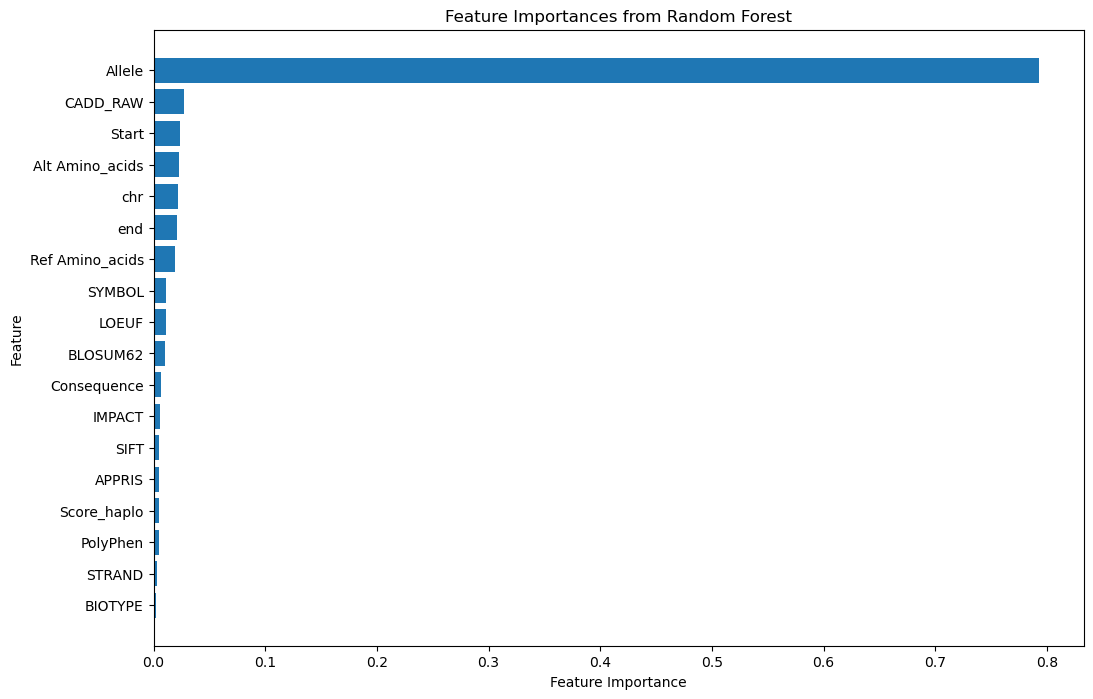

Accuracy with top 9 features: 0.9917763157894737
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       257
           1       0.99      1.00      0.99       351

    accuracy                           0.99       608
   macro avg       0.99      0.99      0.99       608
weighted avg       0.99      0.99      0.99       608



In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# Select top features
top_n = 9
top_features = feature_importance_df.head(top_n)['Feature'].tolist()

# Reduce dataset to top features
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

# Retrain the model with top features
rf_model_top = RandomForestClassifier(random_state=42)
rf_model_top.fit(X_train_top, y_train)

# Evaluate the model with top features
y_pred_top = rf_model_top.predict(X_test_top)
print(f"Accuracy with top {top_n} features: {accuracy_score(y_test, y_pred_top)}")
print(classification_report(y_test, y_pred_top))

# Haploinsufficiency scores had no importance on the mutations.

In [11]:
print(f"Top {top_n} features based on importance:\n", top_features)

Top 9 features based on importance:
 ['Allele', 'CADD_RAW', 'Start', 'Alt Amino_acids', 'chr', 'end', 'Ref Amino_acids', 'SYMBOL', 'LOEUF']


# Saving and loading the model


In [12]:
import joblib

# Save the model to a file
joblib.dump(rf_model_top, 'random_forest_model.pkl')

# To load the model back from the file
loaded_rf_model = joblib.load('random_forest_model.pkl')

# Predictions on patient data

In [13]:
test=pd.read_csv("C:/Users/dell/Documents/VUS/finalstepinannotations/data/test_data.csv",sep=',')
test

,chr,Start,ref,alt,SYMBOL,Ref Amino_acids,Alt Amino_acids,CADD_RAW,LOEUF,Score_haplo,Allele,end
0,13,102875580,G,C,"BIVM-ERCC5,ERCC5",G,R,-0.220858,0.792,30,C,102875580
1,1,241879225,C,A,EXO1,S,Y,"1,193,354",0.925,3,A,241879225
2,2,58226733,G,C,FANCL,L,V,-0.521607,1.570,3,C,58226733
3,16,79599208,C,A,MAF,G,V,0.638051,0.388,30,A,79599208
4,17,12020957,T,C,MAP2K4,V,A,"1,791,656",0.220,30,C,12020957
5,10,70600631,G,A,PRF1,A,V,"3,515,107",1.190,1,A,70600631
6,10,43124887,C,T,RET,R,C,"2,546,797",0.061,3,T,43124887
7,3,4316659,G,A,SETMAR,D,N,"1,286,126",1.070,30,A,4316659
8,14,103699416,G,A,XRCC3,T,M,0.625061,1.720,1,A,103699416


In [14]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

categorical_columns = [ 'Allele', 'SYMBOL', 'Ref Amino_acids', 'Alt Amino_acids','CADD_RAW']

# Preprocess categorical variables in the test data
for col in categorical_columns:
    if col in test.columns:
        le = LabelEncoder()
        test[col] = le.fit_transform(test[col].astype(str))

numerical_columns = ['chr' ,'Start', 'end', 'LOEUF']

# Preprocess numerical variables in the test data
scaler = MinMaxScaler()
test[numerical_columns] = scaler.fit_transform(test[numerical_columns])


In [15]:
top_features = ['Allele', 'CADD_RAW', 'Start', 'Alt Amino_acids', 'chr', 'end', 'Ref Amino_acids', 'SYMBOL', 'LOEUF']

# Ensure all top features are present in the test data
missing_features = [feature for feature in top_features if feature not in test.columns]
for feature in missing_features:
    test[feature] = 0  
    
X_new_test_top = test[top_features]

# Make predictions with the loaded model
y_new_pred = loaded_rf_model.predict(X_new_test_top)

# Mapping back to original class labels 
class_mapping = {0: 'Class1', 1: 'Class2'} #Class1:pathogenic,Class2:benign
y_new_pred_mapped = [class_mapping[label] for label in y_new_pred]

# Print the mapped predictions
print(y_new_pred_mapped)

['Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class2', 'Class1', 'Class2', 'Class2']
